# Importing required Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Reading the dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = df.iloc[:,3:].values

# Finding the best number of clusters using elbow method

Text(0, 0.5, 'The K means inertia')

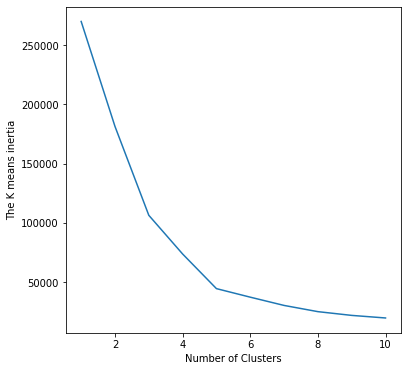

In [4]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = [6,6])
plt.plot(np.arange(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("The K means inertia")
    

## It can be seen that the best number of clusters is 5.

# Kmeans Results

In [5]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

for i in range(5):
    print("The cluster {} includes {} members".format(i, X[y_kmeans == i].shape[0]))

The cluster 0 includes 81 members
The cluster 1 includes 35 members
The cluster 2 includes 23 members
The cluster 3 includes 22 members
The cluster 4 includes 39 members


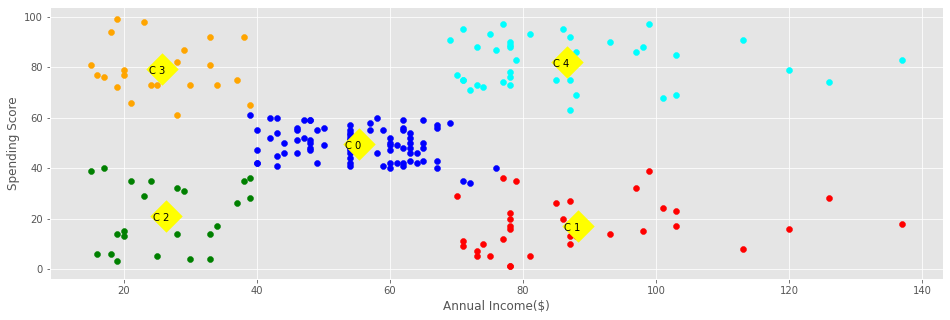

In [41]:
plt.style.use("ggplot")
plt.figure(figsize = [16,5])
color_list = ["blue","red","green","orange","cyan"]
for i in range(5):
    x1 = X[y_kmeans == i][:,0]
    x2 = X[y_kmeans == i][:,1]
    
    plt.scatter(x1,x2,color = color_list[i])
    plt.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1], s = 500,color = "yellow",marker = 'D')
    plt.annotate("C {}".format(i),(kmeans.cluster_centers_[i][0]-2,kmeans.cluster_centers_[i][1]-2),color = "black")
    plt.xlabel("Annual Income($)")
    plt.ylabel("Spending Score")

# Hierarchical Clustering

## Dendrogram for finding theoptimum number of clusters

Text(0.5, 1.0, 'Dendrogram Figure')

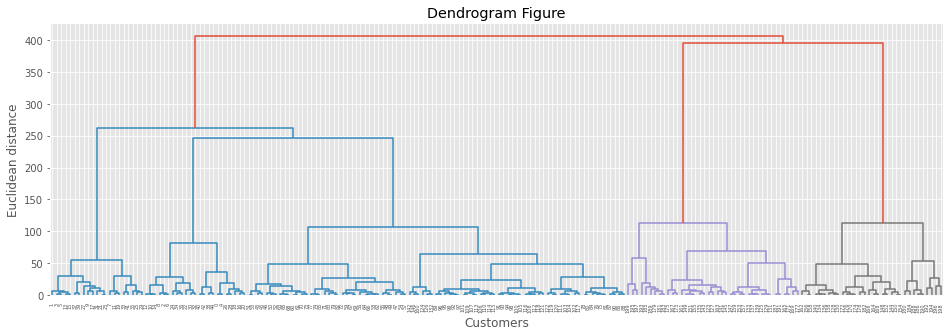

In [42]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = [16,5])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.ylabel("Euclidean distance")
plt.xlabel("Customers")
plt.title("Dendrogram Figure")

## The optimum number of clusters is 5

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster_hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = cluster_hc.fit_predict(X)

hc_centroids = []
for i in range(5):
    
    x1 = X[y_hc == i][:,0].mean()
    x2 = X[y_hc == i][:,1].mean()
    hc_centroids.append((x1,x2))
    print("The cluster {} includes {} members".format(i, X[y_hc == i].shape[0]))  

The cluster 0 includes 32 members
The cluster 1 includes 85 members
The cluster 2 includes 39 members
The cluster 3 includes 21 members
The cluster 4 includes 23 members


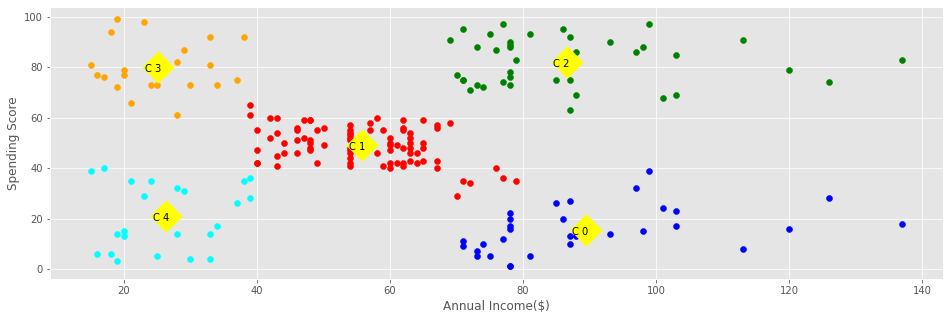

In [43]:
plt.figure(figsize = [16,5])
color_list = ["blue","red","green","orange","cyan"]
for i in range(5):
    x1 = X[y_hc == i][:,0]
    x2 = X[y_hc == i][:,1]
    
    plt.scatter(x1,x2,color = color_list[i])
    plt.scatter(hc_centroids[i][0],hc_centroids[i][1], s = 500,color = "yellow",marker = 'D')
    plt.annotate("C {}".format(i),(hc_centroids[i][0]-2,hc_centroids[i][1]-2),color = "black")
    plt.xlabel("Annual Income($)")
    plt.ylabel("Spending Score")